#  Lab 1 Prykhodko Andrii FB-31mp

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
dataset = "/Users/andrii.p/Downloads/train.csv"

In [3]:
data = pd.read_csv(dataset)

In [4]:
data.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [5]:
data.columns

Index(['profile pic', 'nums/length username', 'fullname words',
       'nums/length fullname', 'name==username', 'description length',
       'external URL', 'private', '#posts', '#followers', '#follows', 'fake'],
      dtype='object')

In [6]:
data.shape

(576, 12)

In [7]:
data.isnull().sum(axis = 0)

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

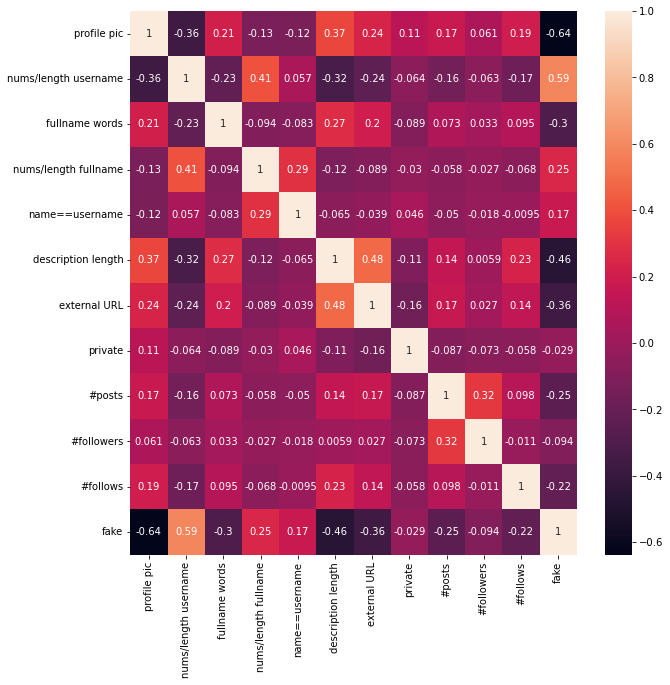

In [8]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot = True, ax = plt.subplot())
plt.show()

In [9]:
data.columns

Index(['profile pic', 'nums/length username', 'fullname words',
       'nums/length fullname', 'name==username', 'description length',
       'external URL', 'private', '#posts', '#followers', '#follows', 'fake'],
      dtype='object')

Text(0.5, 1.0, 'Distribution posts number')

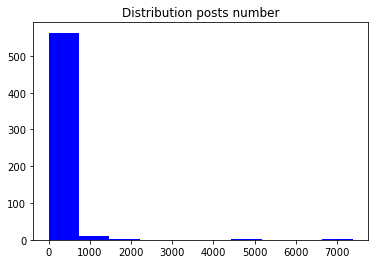

In [10]:
data['#posts'].hist(color='blue', grid=False)
plt.title('Distribution posts number')

Text(0.5, 1.0, 'Distribution followers number')

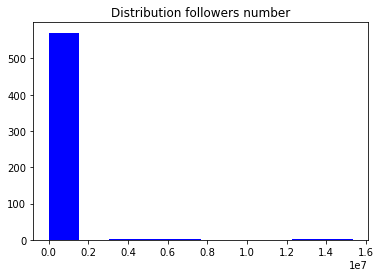

In [11]:
data['#followers'].hist(color='blue', grid=False)
plt.title('Distribution followers number')

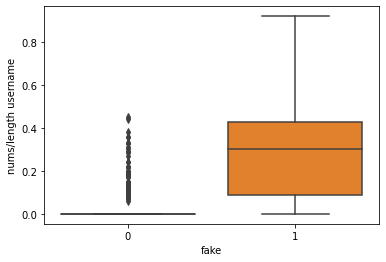

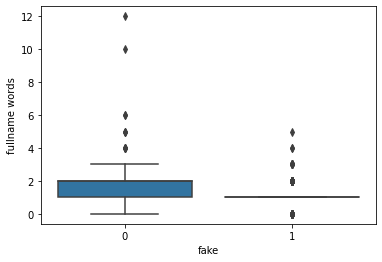

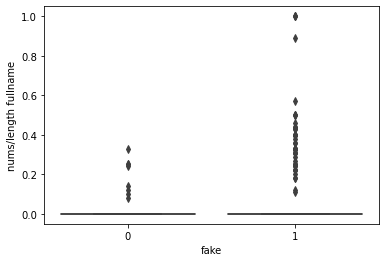

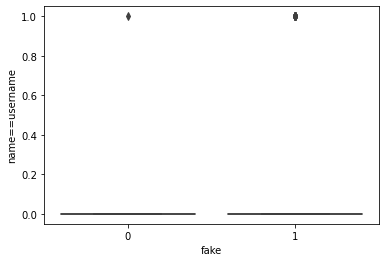

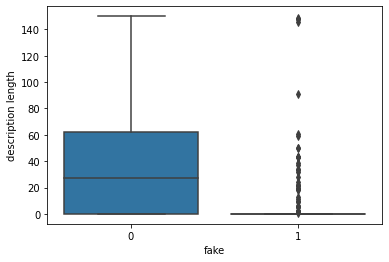

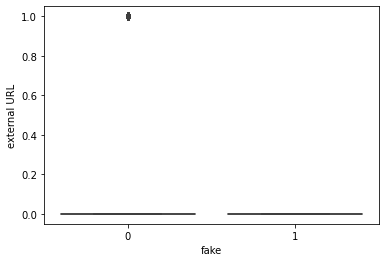

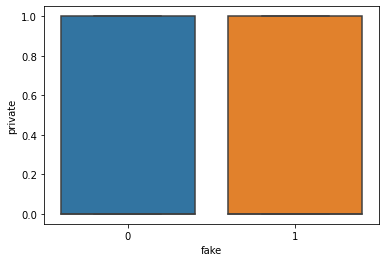

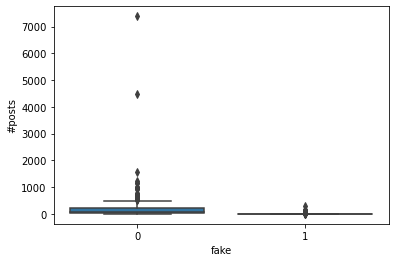

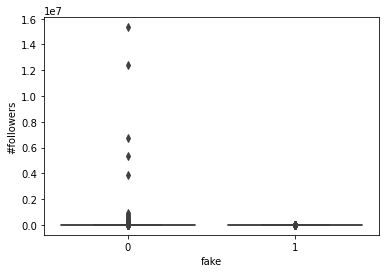

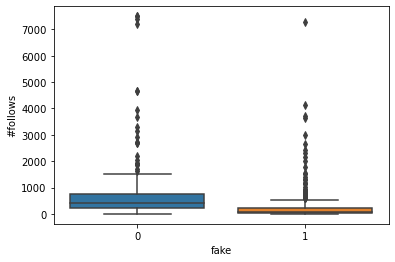

In [12]:
for column in data.columns[1:11]:
    figure = plt.figure()
    ax = sns.boxplot(x="fake", y=column, data=data)

In [13]:
X = data.drop('fake',axis=1)
y = data['fake']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [15]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## KNN

In [16]:
for i in range(1,20):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)*100
    print("Accuracy of our model is equal {}% for {} neighbors".format(str(round(accuracy, 2)), i))


Accuracy of our model is equal 87.86% for 1 neighbors
Accuracy of our model is equal 87.28% for 2 neighbors
Accuracy of our model is equal 87.86% for 3 neighbors
Accuracy of our model is equal 88.44% for 4 neighbors
Accuracy of our model is equal 88.44% for 5 neighbors
Accuracy of our model is equal 89.02% for 6 neighbors
Accuracy of our model is equal 89.6% for 7 neighbors
Accuracy of our model is equal 89.6% for 8 neighbors
Accuracy of our model is equal 90.17% for 9 neighbors
Accuracy of our model is equal 89.6% for 10 neighbors
Accuracy of our model is equal 89.6% for 11 neighbors
Accuracy of our model is equal 89.02% for 12 neighbors
Accuracy of our model is equal 89.6% for 13 neighbors
Accuracy of our model is equal 89.02% for 14 neighbors
Accuracy of our model is equal 89.6% for 15 neighbors
Accuracy of our model is equal 88.44% for 16 neighbors
Accuracy of our model is equal 89.02% for 17 neighbors
Accuracy of our model is equal 87.28% for 18 neighbors
Accuracy of our model is 

In [17]:
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90        80
           1       0.95      0.86      0.90        93

    accuracy                           0.90       173
   macro avg       0.90      0.91      0.90       173
weighted avg       0.91      0.90      0.90       173



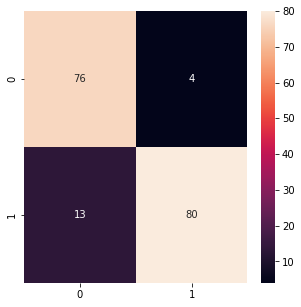

In [19]:
plt.figure(figsize=(5, 5))
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

## Decision tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy')

In [21]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [22]:
y_pred = classifier.predict(X_test)

In [23]:
accuracy = accuracy_score(y_test, y_pred)*100

In [24]:
print("Accuracy of our model is equal {}%".format(str(round(accuracy, 2))))

Accuracy of our model is equal 87.86%


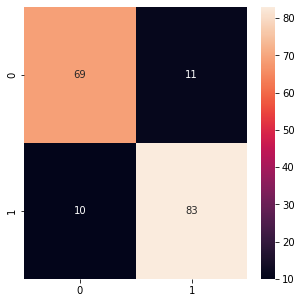

In [25]:
plt.figure(figsize=(5, 5))
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87        80
           1       0.88      0.89      0.89        93

    accuracy                           0.88       173
   macro avg       0.88      0.88      0.88       173
weighted avg       0.88      0.88      0.88       173



## Random forest

In [27]:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [28]:
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
y_pred = classifier.predict(X_test)

In [30]:
accuracy = accuracy_score(y_test, y_pred)*100

In [31]:
print("Accuracy of our model is equal {}%".format(str(round(accuracy, 2))))

Accuracy of our model is equal 91.91%


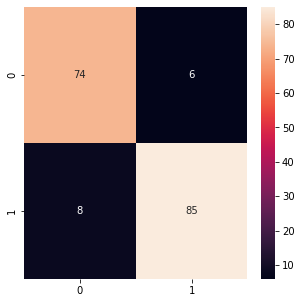

In [32]:
plt.figure(figsize=(5, 5))
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91        80
           1       0.93      0.91      0.92        93

    accuracy                           0.92       173
   macro avg       0.92      0.92      0.92       173
weighted avg       0.92      0.92      0.92       173



## Ada Boost 

In [34]:
classifier = AdaBoostClassifier(n_estimators=100, random_state=0)

In [35]:
classifier.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [36]:
y_pred = classifier.predict(X_test)

In [37]:
accuracy = accuracy_score(y_test, y_pred)*100

In [38]:
print("Accuracy of our model is equal {}%".format(str(round(accuracy, 2))))

Accuracy of our model is equal 90.75%


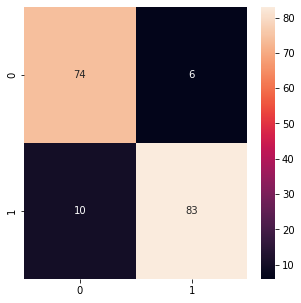

In [39]:
plt.figure(figsize=(5, 5))
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90        80
           1       0.93      0.89      0.91        93

    accuracy                           0.91       173
   macro avg       0.91      0.91      0.91       173
weighted avg       0.91      0.91      0.91       173



## SVM

In [41]:
parameters = {'kernel':('linear', 'rbf'), 'C':[0.1,1, 10],'gamma': [1, 0.1, 0.01, 0.001]}

In [42]:
grid = GridSearchCV(SVC(), parameters)

In [43]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ('linear', 'rbf')})

In [44]:
grid.best_estimator_

SVC(C=10, gamma=1, kernel='linear')

In [45]:
classifier=SVC(C=10, gamma=1, kernel='linear')

In [46]:
classifier.fit(X_train, y_train)

SVC(C=10, gamma=1, kernel='linear')

In [47]:
y_pred = classifier.predict(X_test)

In [48]:
accuracy = accuracy_score(y_test, y_pred)*100

In [49]:
print("Accuracy of our model is equal {}%".format(str(round(accuracy, 2))))

Accuracy of our model is equal 90.75%


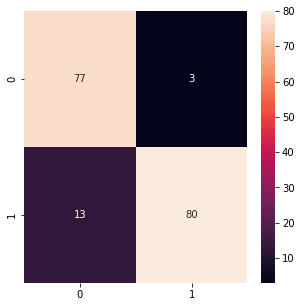

In [50]:
plt.figure(figsize=(5, 5))
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91        80
           1       0.96      0.86      0.91        93

    accuracy                           0.91       173
   macro avg       0.91      0.91      0.91       173
weighted avg       0.91      0.91      0.91       173

